In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, LeaveOneOut, GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier

### Question 1: Les chargements de données

In [3]:

mnist_train = pd.read_csv("mnist_train.csv")
mnist_test = pd.read_csv("mnist_test.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'mnist_train.csv'

### Question 2: la construction des Xtrain, Ytrain, Xtest, Ytest

In [ ]:

Xtrain, Ytrain = mnist_train.iloc[:, 1:], mnist_train.iloc[:, 0]
Xtest, Ytest = mnist_test.iloc[:, 1:], mnist_test.iloc[:, 0]

### Question 3: la Représentation de l’une des observations sous la forme d’un tableau 28*28 


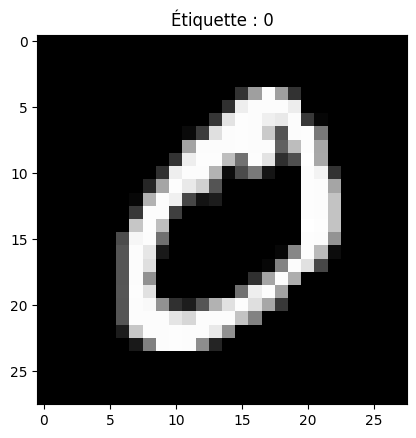

In [ ]:
# l'indice de l'image que vous souhaitez représenter
indice_image = 0  
# Récupération les valeurs des pixels de l'image
image = Xtrain.iloc[indice_image].values
# Remodeler les données pour les afficher en tant qu'image 28x28
image = image.reshape(28, 28)
# Afficher l'image
plt.imshow(image, cmap='gray')
plt.title(f'Étiquette : {Ytrain.iloc[indice_image]}')
plt.show()

J'ai développé une méthode permettant de tracer plusieurs images dans un même graphe en utilisant les informations suivantes :

Entrées :

Une liste d'index d'images.
Les données Xtrain et Ytrain.
Si les index fournis ne se trouvent pas dans Xtrain, la méthode affichera un message indiquant que les index que vous avez entrés ne sont pas présents dans Xtrain. Elle vous fournira également les index qui sont disponibles dans Xtrain, parmi lesquels vous pourrez choisir un échantillon.

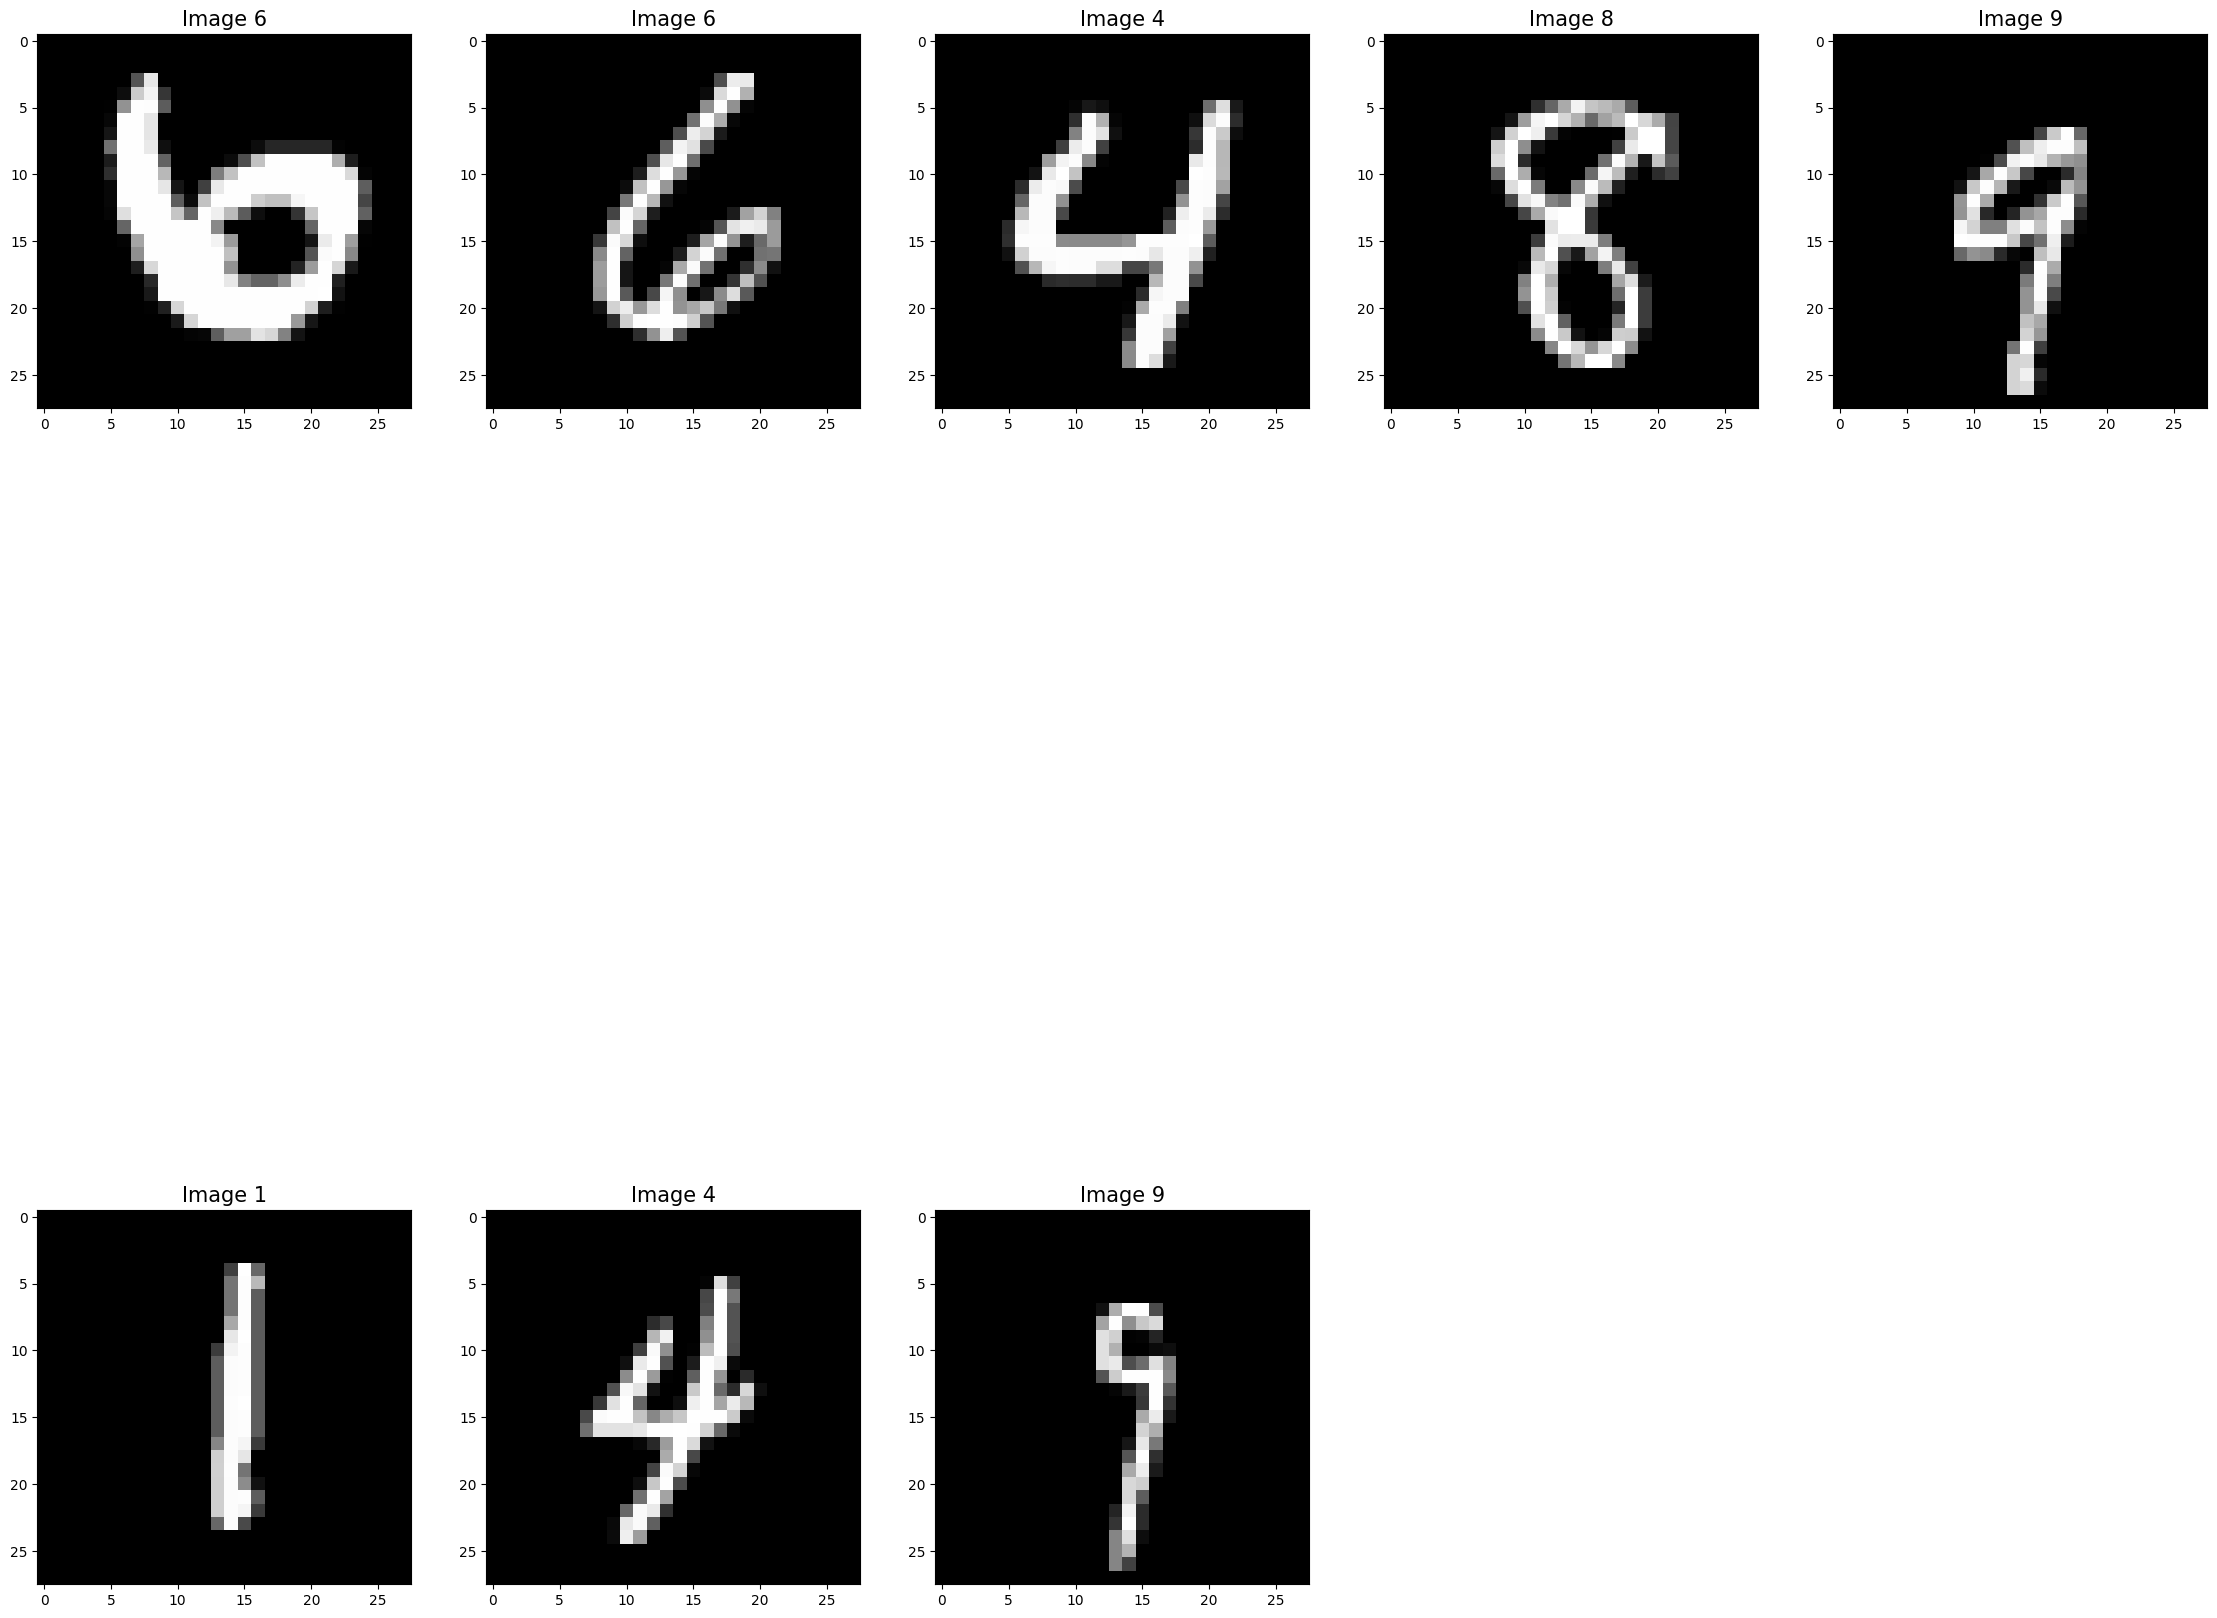

In [ ]:
def show_images(id_images, XData, YData):
    check = all(item in list(XData.index) for item in id_images)
    if check:
       cols = 5
       rows = int(len(id_images)/cols) + 1
       plt.figure(figsize=(28, 28))
       indexx = 1    
       for id in id_images:  
           observation_target = YData[id] 
           observation_feature = XData[XData.index==int(id)].values.reshape(28, 28)      
           plt.subplot(rows, cols, indexx)        
           plt.imshow(observation_feature, cmap=plt.cm.gray)
           plt.title(f'Image {observation_target}', fontsize = 15);        
           indexx += 1
    else:
        print(f"Erreur les indexs que vous avez entré n'ont pas appartenu à les indexs de votre dataframe voici en example des indexs de votre dataframe {list(XData.index)}")
XData, YData= Xtrain, Ytrain
show_images([7989, 6692, 17249, 57163, 56256, 34921, 27000, 32255], Xtrain, Ytrain)

### Question 4: La construction d'un sous-échantillon d'entraînement de 12 000 observations

In [ ]:

sample_size = 12000
Xtrain_sample, Ytrain_sample = Xtrain.sample(n=sample_size, random_state=42), Ytrain.sample(n=sample_size, random_state=42)

### Question 5: Mettre en œuvre l'algorithme k-plus proches voisins

In [ ]:
n=500/12000
k = 10
X_train, X_test, y_train, y_test = train_test_split(Xtrain_sample, Ytrain_sample, test_size=n, random_state=42)
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
predictions = knn.predict(np.array(X_test))

c:\Users\msi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Question 6: La Représentation de la matrice de confusion et l'erreur  de classification

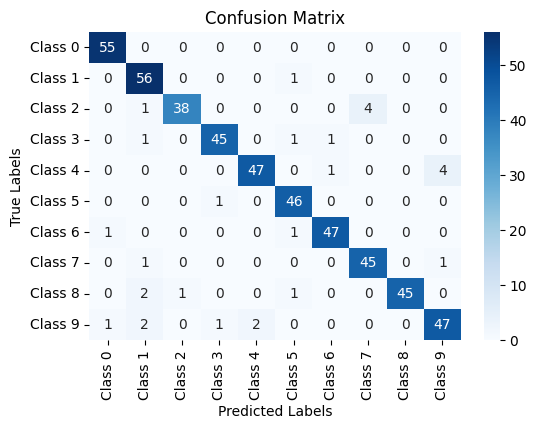

Erreur de classification: 0.0580


In [ ]:
conf_matrix = confusion_matrix(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
             xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3','Class 4', 'Class 5', 'Class 6', 'Class 7','Class 8', 'Class 9'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3','Class 4', 'Class 5', 'Class 6', 'Class 7','Class 8', 'Class 9'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
print(f"Erreur de classification: {1 - accuracy:.4f}")

### La touche personnelle 

Dans cette section, j'ai choisi d'ajouter deux éléments personnels pour enrichir notre approche. Tout d'abord, je vais me familiariser avec les techniques de l'apprentissage semi-supervisé en utilisant l'Analyse en Composantes Principales (ACP) pour réduire la dimensionnalité des données. Ensuite, nous prévoirons de nouvelles observations en utilisant cette réduction de dimension. Enfin, nous exploiterons l'algorithme k-Nearest Neighbors (KNN) pour classer les nouvelles données issues de l'ACP. Nous chercherons également à optimiser les paramètres tels que le nombre de composantes (n_components) et le nombre de voisins (n_neighbors) pour obtenir de meilleures performances.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xtrain_sample, Ytrain_sample, test_size=n, random_state=42)

def Trainig_model_pca_knn(X_train, y_train, k_nieghbors, k_compoents):
   data_train = np.array(X_train)
   pca = PCA(n_components=k_compoents)  
   pca.fit(data_train)  
   datanew = pca.transform(data_train)
   #X_train, X_test, y_train, y_test = train_test_split(datanew, Ytrain_sample, test_size=0.3, random_state=42)
   knn = KNeighborsClassifier(n_neighbors=k_nieghbors)
   knn.fit(datanew, y_train)
   return pca, knn
   
pca, knn=Trainig_model_pca_knn(X_train, y_train, 10, 19)

def prediction_pca_knn(pca, knn, X_test):
   xtest=np.array(X_test)
   xtest=pca.transform(xtest)
   return knn.predict(np.array(xtest))
predictions= prediction_pca_knn(pca, knn, X_test)

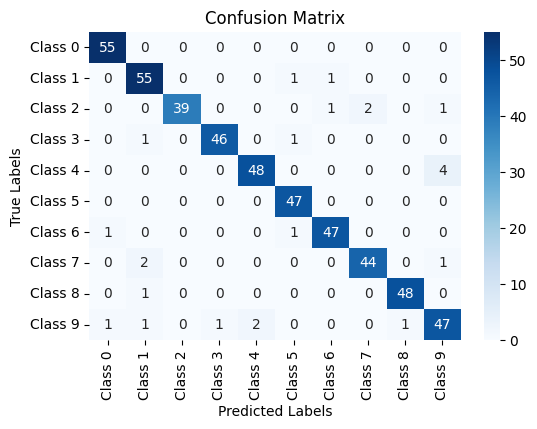

Erreur de classification: 0.0480


In [ ]:

conf_matrix = confusion_matrix(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
             xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3','Class 4', 'Class 5', 'Class 6', 'Class 7','Class 8', 'Class 9'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3','Class 4', 'Class 5', 'Class 6', 'Class 7','Class 8', 'Class 9'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
print(f"Erreur de classification: {1 - accuracy:.4f}")

Dans cette technique, j'ai mis en place deux fonctions distinctes. La première fonction est dédiée à l'entraînement de deux modèles, à savoir l'Analyse en Composantes Principales (ACP) et le k-Nearest Neighbors (KNN). Elle prend en entrée les données Xtrain, Ytrain, ainsi que les hyperparamètres k_neighbors et k_components.
La seconde fonction est conçue pour effectuer des prédictions en utilisant deux modèles préalablement entraînés, à savoir l'ACP et le KNN, sur les données de test Xtest.
En effectuant une recherche minutieuse des paramètres optimaux, j'ai réussi à réduire l'erreur de 0.0580 à 0.0480, améliorant ainsi considérablement les performances de notre modèle.

Dans cette section, j'ai tenté d'appliquer les techniques de validation croisée, mais au final, elles n'ont pas fourni de résultats significativement meilleurs que nos méthodes de l'apprentissage semi-supervisé.

In [ ]:
Xtrain_sample=np.array(Xtrain_sample)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {'n_neighbors': list(range(1, 21))}
clf = GridSearchCV(KNeighborsClassifier(), param_grid, cv=kf, scoring='accuracy')
clf.fit(Xtrain_sample, Ytrain_sample)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]},
             scoring='accuracy')

In [ ]:
#
best_k = clf.best_params_['n_neighbors']
best_accuracy = clf.best_score_
print(f'Meilleur k avec validation croisée 5-fold : {best_k}')
print(f'Précision correspondante : {best_accuracy:.4f}')
##Utiliser GridSearchcv
print(f"Best parameters: {clf.best_params_} with mean score of {round(clf.best_score_,3)}")

Meilleur k avec validation croisée 5-fold : 1
Précision correspondante : 0.9482
Best parameters: {'n_neighbors': 1} with mean score of 0.948
